requirements
- ultralytics : 8.0.54
- cv2 : 4.6.0
- yolo : yolov8s

# 목적

**- 외국인 관광객의 현재 상태(기분)을 실시간으로 얼굴표정으로 표현 -> Yolov8을 이용하여 얼굴표정에 따른 감정을 실시간 분류 -> 기분에 맞는 음식을 추천해주는 것.**

# 데이터 준비

- Roboflow에 있는 얼굴감정 분류 데이터셋 사용(데이터를 따로 전처리 하지 않고 Roboflow에서 제공하는 레이블링된 감정얼굴 데이터 그대로 사용)
  - 출처: https://app.roboflow.com/emotiondetection/faceemotionfinal/1/export
- names = 0: 'anger', 1: 'fear', 2: 'happy', 3: 'neutral', 4: 'sad'로 레이블링 되어있음
- 데이터의 수는 200개인데(1개의 이미지안에 16개의 레이블링 된 감정 이미지가 존재) -> Train:140, val:40, test: 20 이미지로 나눠서 수행

## 모듈 설치 및 import

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.9/496.9 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 23.7 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import os
import urllib

In [4]:
import ultralytics
ultralytics.__version__

'8.0.54'

In [7]:
cv2.__version__

'4.6.0'

# 모델 로드 및 Roboflow에서 전처리 데이터 로드하기

In [ ]:
# load model
model = YOLO("./pretrained/yolov8s.pt")

  0%|          | 0.00/21.5M [00:00<?, ?B/s]

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k20dDJeSZOOD2Eij7KOs")
project = rf.workspace("emotiondetection").project("faceemotionfinal")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=8587d95818e9d42348489a9844445959af2ad9a5f52b41f65f7ffba75a2968ef
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstal

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.54, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to faceemotionfinal-1 in yolov8:: 100%|██████████| 412/412 [00:00<00:00, 2823.81it/s]


# 모델 학습을 위한 준비과정

- data.yaml 파일에서 train, val, test 경로를 지정해야 모델 학습 시에 train.txt, valid.txt, test.txt 파일 내에 저장된 이미지 파일들을 이용하여 학습, 검증, 테스트를 수행 가능
- 따라서, data.yaml 파일에서 train, val, test 경로를 train.txt, valid.txt, test.txt 파일로 지정해줌

In [ ]:
# Roboflow에서 가져온 이미지들 파일에 쓰기
# 밑의 경로는 Roboflow에서 가져온 faceemotionfinal-1파일에 이미지를 리스트로 묶기
from glob import glob

train_img_list = glob('/content/faceemotionfinal-1/train/images/*.jpg')
valid_img_list = glob('/content/faceemotionfinal-1/valid/images/*.jpg')
test_img_list = glob('/content/faceemotionfinal-1/test/images/*.jpg')

In [ ]:
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')
 
with open('./test.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')


# 모델 학습

In [ ]:
model.train(data='/content/faceemotionfinal-1/data.yaml',epochs=50, imgsz=640)

Ultralytics YOLOv8.0.54 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=./pretrained/yolov8s.pt, data=/content/faceemotionfinal-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias
train: Scanning /content/faceemotionfinal-1/train/labels... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<00:00, 1844.85it/s]
train: New cache created: /content/faceemotionfinal-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/faceemotionfinal-1/valid/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 2022.47it/s]
val: New cache created: /content/faceemotionfinal-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/50     

- 위의 학습을 돌리고 나면 runs/detect/train 파일에 weights파일에 best.pt가 생기는데 그것이 모델이다!

In [ ]:
# 저장해둔 모델 불러오기
model = YOLO("/content/drive/MyDrive/딥러닝프로젝트/김태혁 최종 폴더/찐best_faceemotion_model.pt")

In [ ]:
# 예측 -> runs/detect/predict에 bounding box가 그려진채로 저장
results = model.predict(source='/content/drive/MyDrive/딥러닝프로젝트/내사진.jpg', save=True)


image 1/1 /content/drive/MyDrive/딥러닝프로젝트/내사진.jpg: 640x480 1 neutral, 926.9ms
Speed: 2.5ms preprocess, 926.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


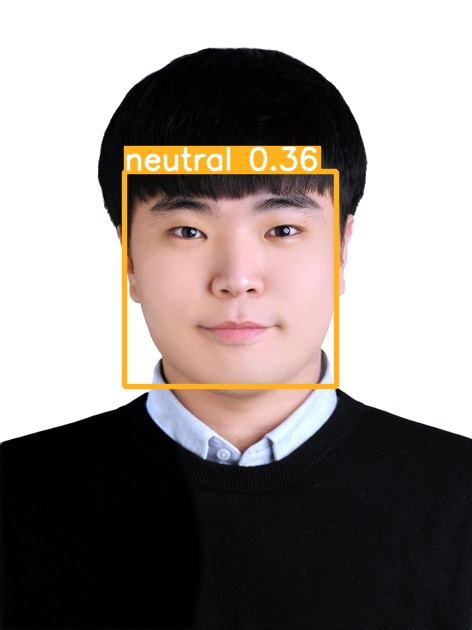

In [ ]:
# 내사진을 넣고 감정분류한 예시
from IPython.display import Image
Image('/content/runs/detect/predict2/내사진.jpg') 

In [ ]:
# results가 어떻게 생겼는지 확인
# tensor([[4.08279e+02, 1.16737e+02, 5.54879e+02, 3.66349e+02, 4.22784e-01, 1.00000e+00]]) -> 이 부분이 중요
# 앞의 숫자 4개는 bounding box의 좌표이고, 5번째는 확률, 6번째가 클래스 넘버이다 
results

[{ '_keys': ('boxes', 'masks', 'probs'),
   'boxes': ultralytics.yolo.engine.results.Boxes
 type:  torch.Tensor
 shape: torch.Size([2, 6])
 dtype: torch.float32
 tensor([[4.14858e+02, 1.34386e+02, 5.49583e+02, 3.18074e+02, 7.38323e-01, 1.00000e+00],
         [4.08279e+02, 1.16737e+02, 5.54879e+02, 3.66349e+02, 4.22784e-01, 1.00000e+00]]),
   'masks': None,
   'names': {0: 'anger', 1: 'fear', 2: 'happy', 3: 'neutral', 4: 'sad'},
   'orig_img': array([[[223, 223, 223],
         [223, 223, 223],
         [223, 223, 223],
         ...,
         [225, 225, 225],
         [225, 225, 225],
         [225, 225, 225]],
 
        [[223, 223, 223],
         [223, 223, 223],
         [223, 223, 223],
         ...,
         [225, 225, 225],
         [225, 225, 225],
         [225, 225, 225]],
 
        [[223, 223, 223],
         [223, 223, 223],
         [223, 223, 223],
         ...,
         [225, 225, 225],
         [225, 225, 225],
         [225, 225, 225]],
 
        ...,
 
        [[219, 219, 

In [ ]:
results[0].boxes.boxes
# 이렇게 뽑는 방식은 vscode에서 livecam으로 예측할때 results값이 여러개이기 때문에 사용불가

tensor([[4.14858e+02, 1.34386e+02, 5.49583e+02, 3.18074e+02, 7.38323e-01, 1.00000e+00],
        [4.08279e+02, 1.16737e+02, 5.54879e+02, 3.66349e+02, 4.22784e-01, 1.00000e+00]])

------
# 로컬로 수행(VS Code)

- 모델 저장후 다음 스텝은 실시간 카메라 인식이 있으므로 로컬에서 수행
- 코드만 붙여놈!

In [ ]:
from ultralytics import YOLO
import cv2
import os
import urllib
import random

# 기분 좋을때
good= ["Grilled ribs", "beef tartare", "braised ribs", "Grilled ribs", "Grilled tripe", "Grilled tripe hot pot"]
# 우울할때 - 생선류 + 단 음식
depressed=["Cold Raw Fish Soup", "Grilled Pollack", "Grilled Eel", "Grilled Chopper", "Grilled Shellfish", "Roasted Dried Pollack", "Chueotang", "Fried Squid", "Fried Shrimp",
 "Seaweed", "Sannakji", "Seasoned raw octopus", "Seaweed", "Shrimp fried rice", "Stir-fried webfoot octopus", "Seasoned crab", "Fish pancake", "Steamed pollack",
"Braised saury," "Dongtae-jjigae," "Steamed seafood," "Seasoned chicken," "Jajangmyeon," "Jjolmyeon," "Kongguksu," "Rice balls," "Japchae",
 "Yubu Sushi", "Rice Skewers", "Pumpkin Jeon", "Soy sauce marinated crab", "Grilled hairtail", "Grilled mackerel", "Steamed mackerel", "Gwamegi"]
# 스트레스받을때 - 매운 음식, 차가운 음식
stressful=["Grilled pollack", "Spicy chicken ribs", "Spicy spicy soup", "Jjolmyeon", "Yukgaejang", "Bibim naengmyeon", "Seasoned raw fish", "Seasoned skate", "Tofu kimchi",
"Stir-fried spicy pork", "Stir-fried webfoot octopus", "Tteokbokki", "Rapokki", "Seasoned crab", "Stir-fried chicken", "Steamed pollack", "Dong7tae jjigae", "Steamed seafood",
"Cold Noodles", "Cold Noodles", "Boiled Potatoes", "Fried Chili", "Kimchi Pancake"]
# 중립일때 -일품요리
neutral = ["Yukhoe", "Cold Raw Fish", "Grilled Eel", "Grilled Pork Belly", "Grilled Shellfish", "Grilled Samgyetang", "fried Squid", "Fried Shrimp", "Seaweed", "Spicy Octopus"
, "Pizza", "Seasoned Chicken", "Pyeonyuk", "Dumpling", "Water Cold Noodles", "Black Bean Noodles", "Youngmu Noodles", "Makguksu", "Ramen", "Kalguksu", "Jjamppong",
"Jjolmyeon", "Banquet Noodles", "Sujebi", "Bibim naengmyeon", "Kongguksu", "Seasoned raw fish", "Seasoned skate", "Japchae", "Yubuchobap", "Japgokbap",
"Rice balls", "rice balls", "bibimbap", "shrimp fried rice", "nurungji", "tofu kimchi", "stir-fried spicy pork", "stir-fried webfoot octopus", "tteokbokki", "rabokki",
"Bossam", "Rice cake skewer", "Pumpkin pancake", "Fish pancake", "Pumpkin porridge", "Jeonbok porridge", "Jokbal", "Sundae", "Sooksu", "Potato pancake", "Gamjatang",
"Egg soup", "Rolled egg", "Steamed egg", "Bear soup_Seolleongtang", "Gimbap", "Kimchi fried rice", "Kimchi stew"]  


names = {0: 'anger', 1: 'fear', 2: 'happy', 3: 'neutral', 4: 'sad'}

model = YOLO('C:/Users/USER/Downloads/yolov8_faceemotion.pt')  # 저장한 모델 로드

results = model.predict(source=0, show=True) # 실시간 카메라가 켜져 객체(얼굴감정) 인식
#print(results)

## results를 문자열로 바꿔서 필요한 부분만 받기
str_results = str(results)
li_result = str_results.split('tensor')[-1].split('masks')[0].split(')')[0].split('[')[2].split(']')[0].split(',') # 출력중에서 마지막 텐서값 가져오기.
result = int(list(map(float, li_result))[-1])


emotion_name = names[result]
#prob = list(map(float, li_result))[-2]
#print(emotion_name)

# 인지한 감정에 따른 음식 추천

if emotion_name == 'happy' :
    select_food = random.choice(good)
    print(f'You must be in a good mood. Hoho! I recommend you to eat when you feel good!')
    print(f'My choice is {select_food}.')
elif emotion_name == 'sad' :
    select_food = random.choice(depressed)
    print(f'You look sad.') 
    print(f'{select_food} is the best when you are depressed.')
elif emotion_name == 'anger' or 'fear' :
    select_food = random.choice(stressful)
    print(f'You look stressed!')
    print(f'{select_food} is the best when you are stressed.')
elif emotion_name == 'neutral' :
    select_food = random.choice(neutral)
    print(f'You dont have much thoughts today~')
    print(f'{select_food}is the best when you dont have any thoughts.!')